# Melanoma with CNN

In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import os
# First, load the image
#dir_path = os.path.dirname(os.path.realpath(__file__))
filename = "./ISIC_0000000.jpg"

# Load the image
image = mpimg.imread(filename)

# Print out its shape
print(image.shape)


(767, 1022, 3)


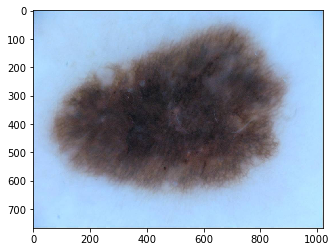

In [2]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [3]:
type(image)

numpy.ndarray

In [4]:
from scipy import ndimage, misc
import numpy as np
import re

images = []
for root, dirnames, filenames in os.walk("C:/Users/Admin/Documents/Skin Depth/Leads and Projects/Melanoma Challenge/2018/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    #print(root)
    for filename in filenames:
        if re.search("\w*reduced.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            #image_resized = misc.imresize(image, (21,28,3))  #redo this size or re-size later in Tensorflow ->STORE resized images later
            images.append(image)
            #filename = filename.split(".")
            #name = filename[0] + "reduced." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #misc.imsave(new_path, image_resized)
            #f.close()
images = np.array(images)

In [5]:
images.shape

(2594, 21, 28, 3)

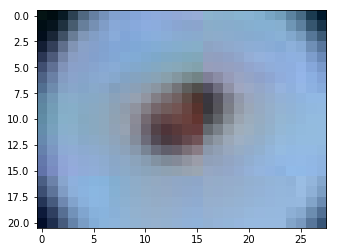

In [6]:
image = images[5,:,:,:]
plt.imshow(image)
plt.show()

In [7]:
#C:/Users\Admin\Documents\Skin Depth\Leads and Projects\Melanoma Challenge\2018\ISIC2018_Task1_Training_GroundTruth\ISIC2018_Task1_Training_GroundTruth
segs = []
for root, dirnames, filenames in os.walk("C:/Users/Admin/Documents/Skin Depth/Leads and Projects/Melanoma Challenge/2018/ISIC2018_Task1_Training_GroundTruth/ISIC2018_Task1_Training_GroundTruth"): 
    for filename in filenames:
        if re.search("\w*reduced.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            seg = ndimage.imread(filepath, mode="L")
            #seg_resized = misc.imresize(seg, (21,28,1))  #redo this size or re-size later in Tensorflow
            segs.append(seg)
            #filename = filename.split(".")
            #name = filename[0] + "reduced." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #os.remove(filepath)
            #f.close()
segs = np.array(segs)

In [8]:
segs.shape

(2594, 21, 28)

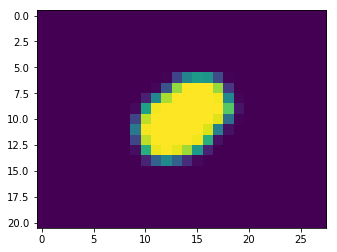

In [9]:
image = segs[5,:,:]
plt.imshow(image)
plt.show()

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [10]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.3) #this is randomized each time the program is started and run from scratch

In [11]:
trainim.shape

(1815, 21, 28, 3)

In [12]:
np.max(testlab)

255

In [13]:
testlab.shape

(779, 21, 28)

In [14]:
training_labels = np.around(trainlab/255)

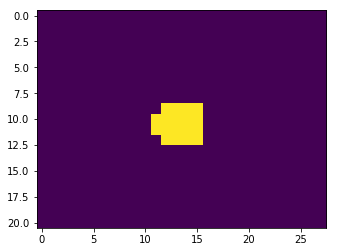

In [15]:
image = training_labels[5,:,:]
plt.imshow(image)
plt.show()

In [16]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        ###Not Needed####
        # Vertically stacks the training images
        #self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])  #insert images here, make sure they are 
        #vetically stacked##
        #train_len = len(self.training_images)
        
        # Reshapes and normalizes training images
        self.training_images = trainim/255   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the training labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        
        ##May need to replace this with code that rounds a humber to 0 or 1 for the mask ##
        self.training_labels = np.around(trainlab/255) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        # Vertically stacks the test images
        #self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        #test_len = len(self.test_images)
        
        # Reshapes and normalizes test images
        self.test_images = testim/255 #self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the test labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = np.around(testlab/255).reshape(-1,588) #one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<100 and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3)  #why is this necessary?
            y = np.vstack((self.training_labels[self.i:self.i+batch_size].reshape(-1,588), self.training_labels[0:xtra].reshape(-1,588)))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3)  #why is this necessary?
            y = self.training_labels[self.i:self.i+batch_size].reshape(-1,588)
        
        self.i = xtra 
        return x, y

In [17]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [18]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [19]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

Create a max pooling layer, again using built in TF functions:

Performs the max pooling on the input.

    Args:
      value: A 4-D `Tensor` with shape `[batch, height, width, channels]` and
        type `tf.float32`.
      ksize: A list of ints that has length >= 4.  The size of the window for
        each dimension of the input tensor.
      strides: A list of ints that has length >= 4.  The stride of the sliding
        window for each dimension of the input tensor.
      padding: A string, either `'VALID'` or `'SAME'`. 

In [20]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [21]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

This is a normal fully connected layer

In [22]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

### Placeholders

In [23]:
x = tf.placeholder(tf.float32,shape=[None,21,28,3])  #trace the shaping of these through the code...

In [24]:
y_true = tf.placeholder(tf.float32,shape=[None,588])  #this now has every pixel in the ground truth segmentation

### Layers

In [25]:
x_image = tf.reshape(x,[-1,21,28,3])  #-1 infers the shape of the first dimension (here, the batch size)

In [26]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,3,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [27]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [28]:
print(convo_2_pooling.shape)

(?, 6, 7, 64)


In [29]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_3_pooling = max_pool_2by2(convo_3)

In [30]:
print(convo_3_pooling.shape)

(?, 3, 4, 128)


In [31]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_4 = convolutional_layer(convo_3_pooling,shape=[3,3,128,256])
convo_4_pooling = max_pool_2by2(convo_4)

In [32]:
print(convo_4_pooling.shape)

(?, 2, 2, 256)


In [33]:
# Why 7 by 7 image? Because we did 2 pooling layers, so (28/2)/2 = 7
# 64 then just comes from the output of the previous Convolution
convo_4_flat = tf.reshape(convo_4_pooling,[-1,2*2*256])
full_layer_one = tf.nn.relu(normal_full_layer(convo_4_flat,1024))

In [34]:
# NOTE THE PLACEHOLDER HERE!
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [35]:
full_layer_two = tf.nn.relu(normal_full_layer(full_one_dropout,1024))

In [36]:
full_layer_three = tf.nn.relu(normal_full_layer(full_layer_two,1024))

## Augment the output with a direct connection to the input photo

#do not use for now

flat_in = tf.reshape(x,[-1,1764])
aug = tf.concat([flat_in, full_one_dropout], axis = 1)
print(flat_in.shape)
print(full_one_dropout.shape)
print(aug.shape)
##need to think about how to concatenate these


full_one_plus_in = tf.convert_to_tensor(aug, dtype=tf.float32)

type(full_one_dropout)

In [37]:
y_pred = normal_full_layer(full_layer_three,588)

### Loss Function

In [38]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

### Optimizer

In [39]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)   #can this be done for each pixel?

### Intialize Variables

In [40]:
init = tf.global_variables_initializer()

### Session

In [41]:
mel = MelHelper()
mel.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


Currently on step 0
mel i is  100


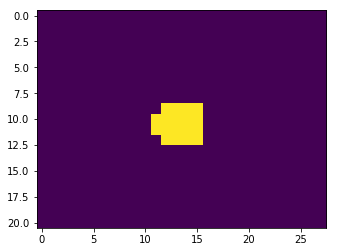

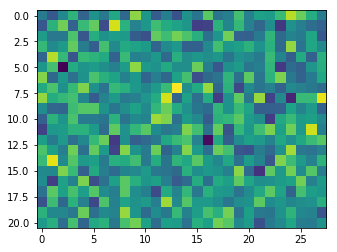

Currently on step 500
mel i is  1095


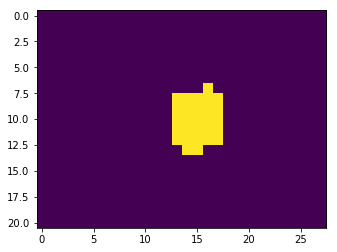

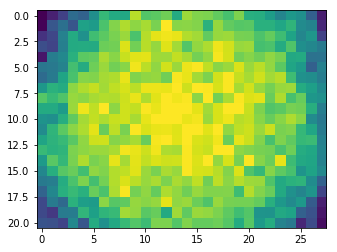

Currently on step 1000
mel i is  275


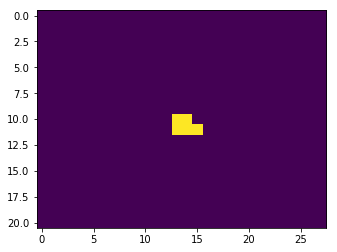

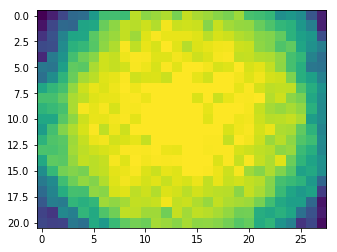

Currently on step 1500
mel i is  1270


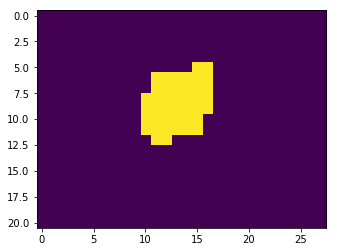

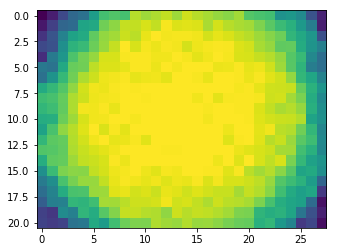

Currently on step 2000
mel i is  450


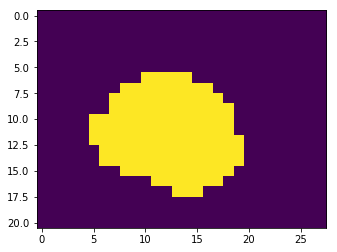

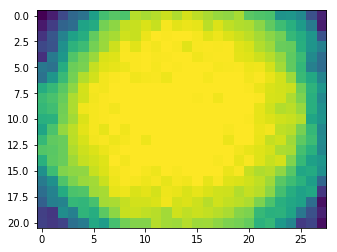

Currently on step 2500
mel i is  1445


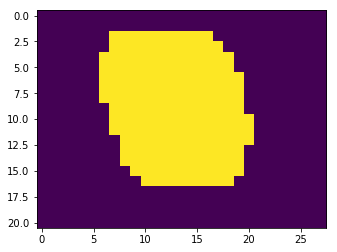

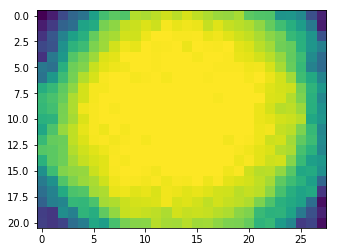

Currently on step 3000
mel i is  625


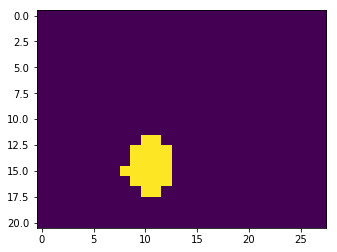

C:\Users\Admin\Anaconda2\envs\tfdeeplearning\lib\site-packages\matplotlib\colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\Admin\Anaconda2\envs\tfdeeplearning\lib\site-packages\numpy\ma\core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


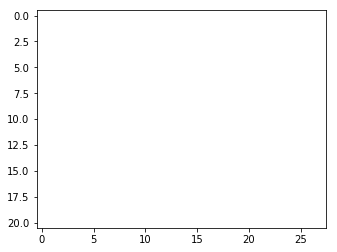

KeyboardInterrupt: 

In [42]:
steps = 50000
import time
batch_size = 100

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    sess.run(init)
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        
       # print("\n")
        #print("batch training labels shape is ", batch_y.shape)
        #print("batch training labels type is ", batch_y.dtype)
        #print("batch training labels are ", batch_y)
        image = batch_y.reshape(-1,21,28)[5,:,:]
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        #print("batch training prediction are ", batch_y)
        image_pred = sess.run(y_pred,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5} ).reshape(-1,21,28)[5,:,:]
        
    
        if i%500 == 0:
             print('Currently on step {}'.format(i))
             print("mel i is ", mel.i)
             plt.imshow(image)
             plt.show()
             plt.imshow(image_pred)
             plt.show()
            
            #print('Currently on step {}'.format(i))
            #print('Accuracy is:')
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            #acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            
          
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))  ###REPLACE THIS LINE TO INCLUDE JACARD INDEX####
            #y_pred = tf.round(y_pred)
            #y_true = tf.round(y_true)
            #intersect = tf.cast(tf.equal(y_pred,y_true), tf.float32)
            #union = tf.reduce_sum(y_pred) + tf.reduce_sum(y_true) - intersect  #think this has an error
            #jacc = intersect/union
            #acc = tf.reduce_mean(tf.cast(intersect,tf.float32))
            #print("test labels shape is ", mel.test_labels.shape)
            #print("\n")
            
            #print('Jacc is:')
            #print(sess.run(acc,feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})) 

In [1]:
print(batch_x)

NameError: name 'batch_x' is not defined

## Great Job!